<a href="https://colab.research.google.com/github/jensullrich/DataScienceSS20/blob/ex7/Exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________________________________________________

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [45]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model


# 1. Build a new model
input_img = Input(shape=(784,))

encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(encoded)

latent = Dense(64, activation="relu")(encoded)

decoded = Dense(128, activation="relu")(latent)
decoded = Dense(784, activation="sigmoid")(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_28 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_31 (Dense)             (None, 784)               101136    
Total params: 222,352
Trainable params: 222,352
Non-trainable params: 0
_____________________________________________________

In [0]:
# 2.Loss
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [48]:
# 3.Training
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=64)

(60000, 784)
(10000, 784)
Epoch 1/50
60000/60000 [==============================] - 7s 122us/step - loss: 0.2533
Epoch 2/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1753
Epoch 3/50
60000/60000 [==============================] - 7s 118us/step - loss: 0.1520
Epoch 4/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.1379
Epoch 5/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.1282
Epoch 6/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.1216
Epoch 7/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.1165
Epoch 8/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1126
Epoch 9/50
60000/60000 [==============================] - 7s 117us/step - loss: 0.1093
Epoch 10/50
60000/60000 [==============================] - 7s 120us/step - loss: 0.1068
Epoch 11/50
60000/60000 [==============================] - 7s 119us/step - loss: 0.1047
Epoch 12/50
600

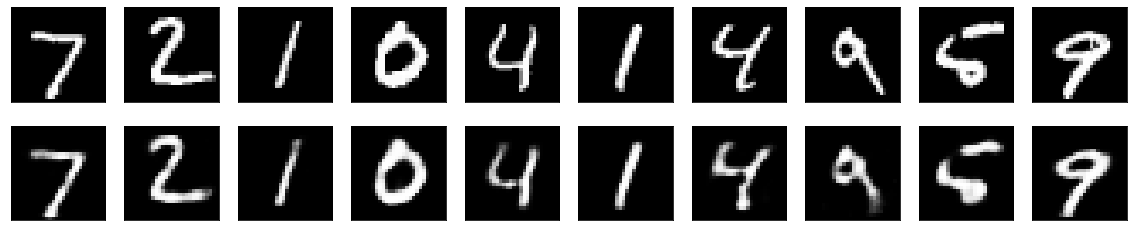

In [49]:
# 4. Testing
decoded_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

[0.00353503 0.00867376 0.00211721 ... 0.00497037 0.00755266 0.01297244]


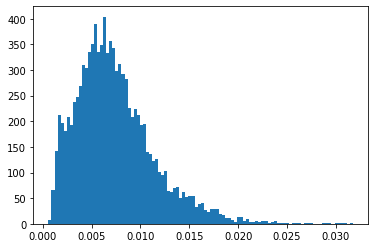

In [60]:
# Error calculation
from sklearn.metrics import mean_squared_error
error = np.array([mean_squared_error(x_test[i], decoded_imgs[i]) 
  for i in range(len(x_test))])
print(error)
t=plt.hist(error, bins=100)

In [0]:
outliers = x_test[error >= 0.024]
np.shape(outliers)
decoded_outliers = decoded_imgs[error >= 0.024]

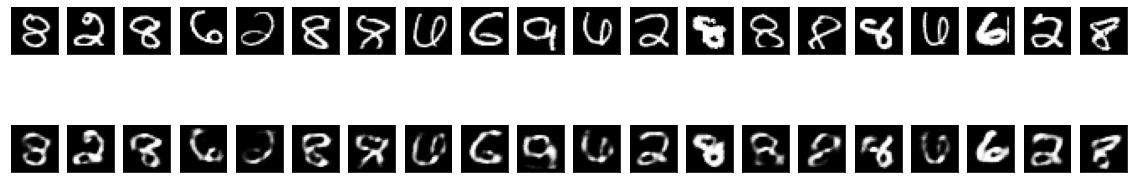

In [66]:
n = 20  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(outliers[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_outliers[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()